In [ ]:
import glob
from matplotlib import pyplot as plt
import math
import numpy as np
import argparse
import glob
import cv2
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import keras
from keras import models
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Load images... 0
Load images... 1
Load images... 2
Load images... 3
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 9216)              0         
____________________________________________________

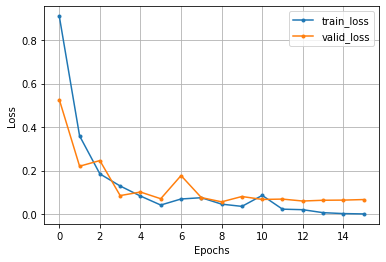

29/29 [==============================] - 0s 16ms/step - loss: 0.0507 - accuracy: 0.9957
Evaluate : [0.05070550739765167, 0.9956616163253784]
F1 score : 0.9955112684782604
[[9.00495511e-11 2.13514610e-08 1.00000000e+00 8.09734042e-26]
 [9.99999881e-01 6.02967702e-08 1.73850918e-15 3.34220872e-20]
 [4.55553888e-08 1.00000000e+00 5.60479160e-14 1.30874371e-19]
 ...
 [1.00792590e-07 9.99999881e-01 1.18372312e-19 2.39206785e-22]
 [1.17486245e-07 6.77574385e-11 6.40293844e-17 9.99999881e-01]
 [4.73669347e-16 1.00000000e+00 4.06513120e-24 5.02399774e-25]]


In [66]:
list_folder = ["brass", "cooper", "1euro", "2euro"]
x_data = []
y_data = []
for num, folder in enumerate(list_folder):
    print("Load images... " + str(num))
    list_img = glob.glob(folder + "/*.jpg")
    for img in list_img:
        img = cv2.imread(img)
        d = 64 / img.shape[1]
        dim = (64, int(img.shape[0] * d))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
        

#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         plt.imshow(gray)
#         plt.show()
#         clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#         gray = clahe.apply(gray)
#         plt.imshow(gray)
#         plt.show()
#         edged = cv2.Canny(gray, 20, 200) 
#         plt.imshow(edged)
#         plt.show()
#         threshMean1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
#         plt.imshow(threshMean1)
#         plt.show()
#         img = img_to_array(threshMean1)
        
        
        x_data.append(img)
        y_data.append(num)

x_data = np.array(x_data)
y_data = np.array(y_data)

x_data = x_data.astype('float32') / 255.0

y_data = to_categorical(y_data, len(list_folder))

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=1)

model = models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(4, activation='softmax'))

# model.add(Conv2D(128, kernel_size=(3, 3),strides=(1, 1), activation='relu', input_shape=(128, 128, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(1028, activation='relu'))

# model.add(Dense(4, activation='softmax'))


model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=16, epochs=16, validation_data=(x_valid, y_valid))


open('model_coin.json', 'w').write(model.to_json())
model.save_weights('weights_coin.h5') 

train_loss = history.history['loss']
valid_loss = history.history['val_loss']
nb_epoch = len(train_loss)
plt.plot(range(nb_epoch), train_loss, marker='.', label='train_loss')
plt.plot(range(nb_epoch), valid_loss, marker='.', label='valid_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



eval_test = model.evaluate(x_test, y_test)
print("Evaluate : " + str(eval_test))

y_pred = model.predict(x_test)
eval_f1 = f1_score(np.argmax(y_test, 1), np.argmax(y_pred, 1), average='macro')
print("F1 score : " + str(eval_f1))
print(y_pred)

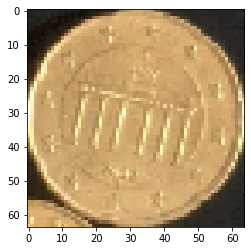

99.56 %
Brass


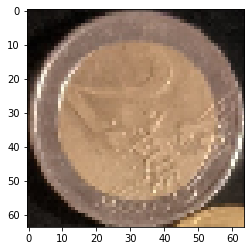

100.0 %
Euro2


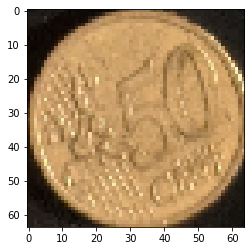

99.77 %
Brass


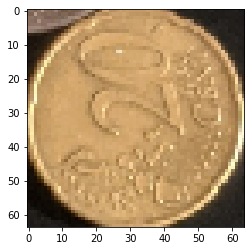

99.62 %
Brass


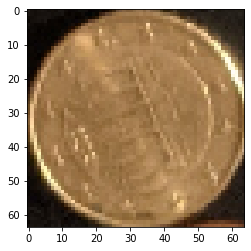

99.55 %
Brass


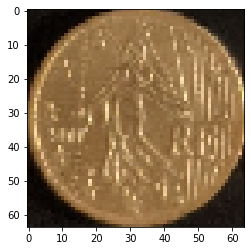

99.97 %
Brass


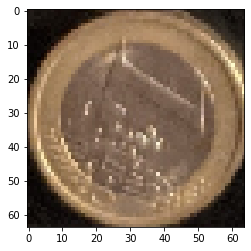

99.95 %
Euro1


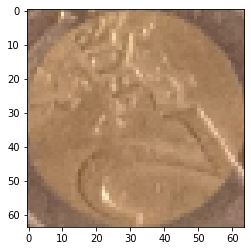

95.34 %
Brass


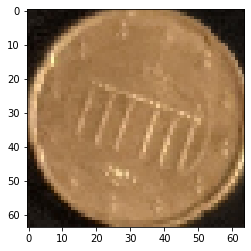

99.69 %
Brass


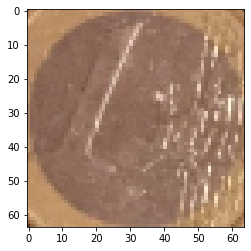

99.36 %
Copper


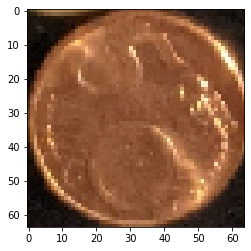

100.0 %
Copper


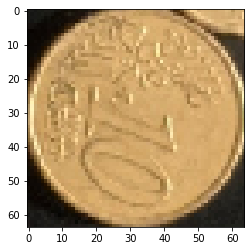

99.93 %
Brass


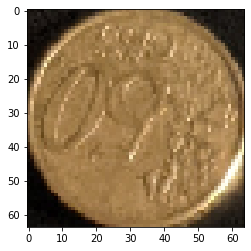

99.95 %
Brass


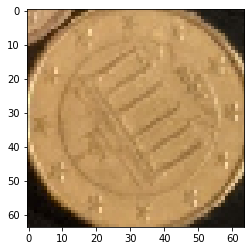

99.76 %
Brass


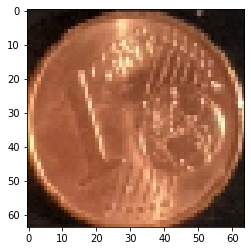

100.0 %
Copper


-1

In [149]:
## CZĘŚĆ KODU ODPOWIEDZIALNA ZA ROZPOZNAWANIE MATERIAŁU

bb = glob.glob("Brass_end/*")
for f in bb:
    os.remove(f)
    
bb = glob.glob("Cooper_end/*")
for f in bb:
    os.remove(f)

bb = glob.glob("1euro_end/*")
for f in bb:
    os.remove(f)

bb = glob.glob("2euro_end/*")
for f in bb:
    os.remove(f)
    
input = "input8"
##ZMIANA WARTOŚCI INPUTU ZMIENIA OBRAZ DO WYKRYWANIA MONET#################################
image = cv2.imread(input+".jpg")
d = 1024 / image.shape[1]
dim = (1024, int(image.shape[0] * d))
image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)


output = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

gray = clahe.apply(gray)


blurred = cv2.GaussianBlur(gray, (7, 7), 0)


circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.8, minDist=90,
                           param1=200, param2=100, minRadius=30, maxRadius=140)

class Enum(tuple): __getattr__ = tuple.index

Material = ['Brass', 'Copper', 'Euro1', 'Euro2']

def predictMaterial(path):
    x_sprawdzenie = []
    imgend = cv2.imread(path)
    img = load_img(path, target_size=(64, 64))
    plt.imshow(img)
    plt.show()
    img = img_to_array(img)
    x_sprawdzenie.append(img)
    x_sprawdzenie = np.array(x_sprawdzenie)
    x_sprawdzenie = x_sprawdzenie.astype('float32') / 255.0
    y_prediction = model.predict(x_sprawdzenie)

    max = np.max(y_prediction)
    maxinpercet = round(max*100,2)
    print(maxinpercet, "%")
    
    for i in range(0,4):
        if y_prediction[0,i] == max:
            iterator = i

    if iterator == 0:
        pathend = ("Brass_end/"+"coin" + str(count) + ".jpg")
        cv2.imwrite(pathend, imgend)
        return Material[0]
    if iterator == 1:
        pathend = ("Cooper_end/"+"coin" + str(count) + ".jpg")
        cv2.imwrite(pathend, imgend)
        return Material[1]
    if iterator == 2:
        pathend = ("1euro_end/"+"coin" + str(count) + ".jpg")
        cv2.imwrite(pathend, imgend)
        return Material[2]
    if iterator == 3:
        pathend = ("2euro_end/"+"coin" + str(count) + ".jpg")
        cv2.imwrite(pathend, imgend)
        return Material[3]
    
    
    
    
diameter = []
materials = []
coordinates = []

count = 0
if circles is not None:
    for (x, y, r) in circles[0, :]:
        diameter.append(r)

    circles = np.round(circles[0, :]).astype("int")

    for (x, y, d) in circles:
        count += 1

        coordinates.append((x, y))

        roi = image[y - d:y + d, x - d:x + d]
        path = ("coins/"+"coin" + str(count) + ".jpg")
        cv2.imwrite(path, roi)
        
        
        material = predictMaterial(path)
        print(material)
        materials.append(material)

        if False:
            m = np.zeros(roi.shape[:2], dtype="uint8")
            w = int(roi.shape[1] / 2)
            h = int(roi.shape[0] / 2)
            cv2.circle(m, (w, h), d, (255), -1)
            maskedCoin = cv2.bitwise_and(roi, roi, mask=m)
            cv2.imwrite("extracted/01coin{}.png".format(count), maskedCoin)

        cv2.circle(output, (x, y), d, (0, 255, 0), 2)

d = 512 / output.shape[1]
dim = (512, int(output.shape[0] * d))
image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
output = cv2.resize(output, dim, interpolation=cv2.INTER_AREA)

cv2.putText(output, "Coins detected: {}".format(count),
            (5, output.shape[0] - 24), cv2.FONT_HERSHEY_PLAIN,
            1.0, (0, 0, 255), lineType=cv2.LINE_AA)

cv2.imshow("Output", np.hstack([image, output]))
cv2.waitKey(0)

In [145]:
## CZĘŚĆ KODU ODPOWIEDZIALNA ZA ROZPOZNAWANIE NOMINAŁU

import glob
import cv2
import os

#####################################################
coins = glob.glob("1euro_end/*")
count = 0
sumaE1 =0

for p in coins:
    count+=1

sumaE1 = count

#################################################################################

coins = glob.glob("2euro_end/*")
count = 0
sumaE2 =0

for p in coins:
    count+=1

sumaE2 = 2 * count

#################################################################################


coins = glob.glob("Brass_end/*")
count = 1
sumaB = 0.0

max = 0.0
min = 99000.0
mean = 0
for p in coins:
    ii = cv2.imread(p)
    w, h, u = ii.shape
    if(max<w):
        max =w
    if(w<min):
        min = w
    mean+=w
mean = mean / len(coins)
odn1= 0.060* max
odn2= 0.060* min

for p in coins:

    ii = cv2.imread(p)
    w, h, u = ii.shape

    if w <= min+odn2:
        sumaB += 1
    elif (w >= min+odn2)& (w <= max-odn1):
        sumaB+= 2
    elif w >= max-odn1:
        sumaB+= 5

    count += 1
sumaB = sumaB/10
###################################################################################


coins = glob.glob("Cooper_end/*")
count = 1
sumaC =0.00
max = 0.0
min = 99000.0
mean = 0
for p in coins:
    ii = cv2.imread(p)
    w, h, u = ii.shape
    if(max<w):
        max =w
    if(w<min):
        min = w
    mean+=w
mean = mean / len(coins)


for p in coins:
    ii = cv2.imread(p)
    w, h, u = ii.shape

    if w <= min+odn2:
        sumaC+= 1
    elif (w >= min+odn2)& (w <= max-odn1):
        sumaC+= 2
    elif w >= max-odn1:
        sumaC+= 5

    count+=1
sumaC = sumaC/100

########################################
suma = 0
suma = sumaC+sumaB+sumaE1+sumaE2
print(sumaC)
print(sumaB)
print(sumaE1)
print(sumaE2)

print(suma)


0.01
2.4
2
4
8.41


In [148]:
## CZĘŚĆ KODU DO PORÓWNAŃ

another = {
            'input1': 9.06,
            'input2': 5.76,
            'input3': 6.16,
            'input4': 7.71,
            'input5': 8.26
        }
suma = round(suma, 2)
blad = abs(suma - another[input])
blad_wzg = (abs(suma - another[input]))/suma

print( "Wartość monet uzyskana za pomocą algorytmu: " +str(suma) + "\n" +
       "Dokładna wartość monet: " + str(another[input]) + "\n" +
       "Wartość błędu wzglednego: " + str(blad) + "\n" +
       "Wartość błedu wzglednego: " + str(blad_wzg))

Wartość monet uzyskana za pomocą algorytmu: 8.41
Dokładna wartość monet: 8.26
Wartość błędu wzglednego: 0.15000000000000036
Wartość błedu wzglednego: 0.017835909631391242
